<a href="https://colab.research.google.com/github/databyhuseyn/DeepLearning/blob/main/Transfer_Learning_in_Tensorflow_part_2_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Get helper_functions.py script from Github
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2024-05-01 11:47:38--  https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-05-01 11:47:38 (24.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



# 10% of Food Data

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data('10_food_classes_10_percent.zip')

--2024-05-01 11:47:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.101.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   178MB/s    in 0.9s    

2024-05-01 11:47:45 (178 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
# Walk through 10 percent data directory and list numbers of files
walk_through_dir('/content/10_food_classes_10_percent')

There are 2 directories and 0 images in '/content/10_food_classes_10_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '/content/10_food_cl

In [4]:
train_dir = '/content/10_food_classes_10_percent/train/'
test_dir = '/content/10_food_classes_10_percent/test/'

In [5]:
import tensorflow as tf
IMG_SIZE = (224, 224)
batch_size = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size = batch_size)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size = IMG_SIZE,
                                                                           label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [6]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [7]:
# Check out the class names of our dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [8]:
# see and example batch of data
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[1.58169641e+01 8.81696415e+00 0.00000000e+00]
   [1.44508934e+01 7.45089293e+00 0.00000000e+00]
   [1.49151783e+01 7.91517878e+00 0.00000000e+00]
   ...
   [9.60003891e+01 5.58307152e+01 1.96610374e+01]
   [9.83112106e+01 5.49585190e+01 1.65076199e+01]
   [9.80625458e+01 5.06115837e+01 1.07945995e+01]]

  [[1.58169641e+01 8.81696415e+00 0.00000000e+00]
   [1.44508934e+01 7.45089293e+00 0.00000000e+00]
   [1.49151783e+01 7.91517878e+00 0.00000000e+00]
   ...
   [9.10684586e+01 4.81797218e+01 1.29446774e+01]
   [8.98297577e+01 4.53788605e+01 7.47706699e+00]
   [9.57455597e+01 4.82946014e+01 8.47761345e+00]]

  [[1.58169641e+01 8.81696415e+00 0.00000000e+00]
   [1.44508934e+01 7.45089293e+00 0.00000000e+00]
   [1.49151783e+01 7.91517878e+00 0.00000000e+00]
   ...
   [8.35294037e+01 4.05293999e+01 5.52940178e+00]
   [8.76693344e+01 4.42184334e+01 8.31663895e+00]
   [8.92133484e+01 4.45714264e+01 6.28759336e+00]]

  ...

  [[3.93461800e+00 2.50609016e+00 0.00000000e+00]
   [9

# Transfer Learning

In [9]:
# Create base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# Freeze the base model
base_model.trainable = False

# Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='input_layer')

# Pass the inputs into the base_model (note: using tf.keras.applications, EfficientNetV2 inputs don't have to be normalizer)
x = base_model(inputs)
# Check data shape after passing it to base model
print(f'Shape after base_model: {x.shape}')

# Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f'Shape after GlobalAveragePooling2D(): {x.shape}')

# Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

# Combine the inputs with the outputs into a mode
model_0 = tf.keras.Model(inputs, outputs)

# Compile the model
model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

# Fit the model (we use less steps for validation so it's faster)
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data_10_percent,
                                 validation_steps=int(0.25 * len(test_data_10_percent)),
                                 callbacks=[create_tensorboard_callback('transfer_learning', '10_percent_feature_extract')])

24274472/24274472 [==============================] - 0s 0us/step
Shape after base_model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20240501-114809
Epoch 1/5
24/24 [==============================] - 33s 432ms/step - loss: 1.8755 - accuracy: 0.4347 - val_loss: 1.3236 - val_accuracy: 0.7204
Epoch 2/5
24/24 [==============================] - 8s 302ms/step - loss: 1.1575 - accuracy: 0.7320 - val_loss: 0.8836 - val_accuracy: 0.8076
Epoch 3/5
24/24 [==============================] - 7s 261ms/step - loss: 0.8518 - accuracy: 0.8080 - val_loss: 0.7195 - val_accuracy: 0.8405
Epoch 4/5
24/24 [==============================] - 5s 195ms/step - loss: 0.6819 - accuracy: 0.8493 - val_loss: 0.6087 - val_accuracy: 0.8586
Epoch 5/5
24/24 [==============================] - 7s 219ms/step - loss: 0.5940 - accuracy: 0.8707 - val_loss: 0.5766 - val_accuracy: 0.8520


In [10]:
# Check layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, '|', layer, '|', layer.name)

0 | <keras.src.engine.input_layer.InputLayer object at 0x7c335a131960> | input_1
1 | <keras.src.layers.preprocessing.image_preprocessing.Rescaling object at 0x7c3359efd480> | rescaling
2 | <keras.src.layers.preprocessing.normalization.Normalization object at 0x7c3359efe8c0> | normalization
3 | <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7c33f487ac20> | stem_conv
4 | <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7c3359eff610> | stem_bn
5 | <keras.src.layers.core.activation.Activation object at 0x7c3359eff700> | stem_activation
6 | <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7c3358440520> | block1a_project_conv
7 | <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7c3358441840> | block1a_project_bn
8 | <keras.src.layers.core.activation.Activation object at 0x7c33584419c0> | block1a_project_activation
9 | <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7c3358442800> | block2a_expand

In [11]:
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 32)       864       ['normalizatio

In [12]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
__________________

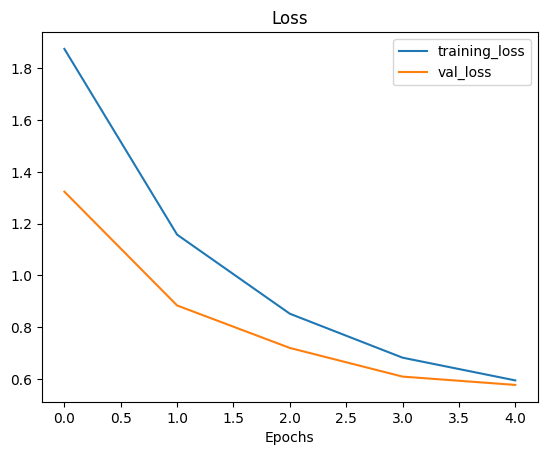

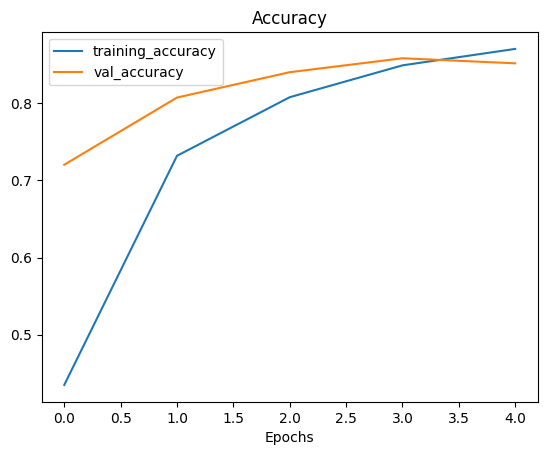

In [13]:
plot_loss_curves(history_10_percent)

In [14]:
# Define input tensor shape (same number of dimensions as the output of efficientnetv2-b0)
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f'Random input tensor:\n {input_tensor} \n')

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f'2D global average pooled random tensor:\n {global_average_pooled_tensor} \n')

# Check the shapes of the different tensors
print(f'Shape of input tensor:{input_tensor.shape}')
print(f'Shape of 2D global averaged pooled input tensor:{global_average_pooled_tensor.shape}')

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]] 

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]] 

Shape of input tensor:(1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor:(1, 3)


In [15]:
# This is the same as GlobalAveragePooling2D()
tf.reduce_mean(input_tensor, axis=[1, 2])     # average across the moddle axes

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

# Running a series of transfer learning experiments

In [16]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2024-05-01 11:49:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   202MB/s    in 0.6s    

2024-05-01 11:49:26 (202 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [17]:
walk_through_dir('/content/10_food_classes_1_percent')

There are 2 directories and 0 images in '/content/10_food_classes_1_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '/content/10_food_classes_1_pe

In [18]:
import tensorflow as tf

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode='categorical',
                                                                           batch_size=batch_size,
                                                                           image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    # preprocessing.Rescaling(1./255)   # keep for ResNet50V2, remove for EfficientNetV2B0
], name='data_augmentation')

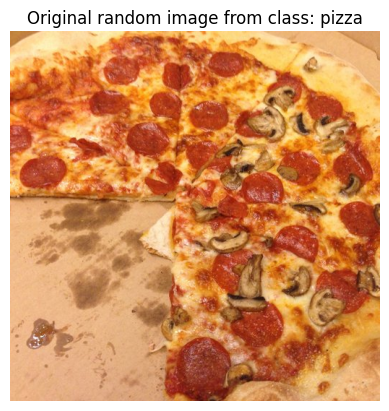

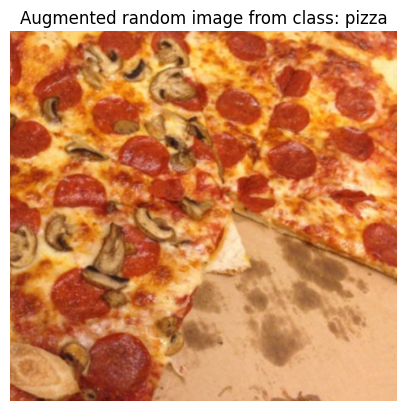

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)    # choose a random class
target_dir = '/content/10_food_classes_1_percent/train/' + target_class   # create target directory
random_image = random.choice(os.listdir(target_dir))      # choose a random image from target directory
random_image_path = target_dir + '/' + random_image       # Create the choosen random image path
img = mpimg.imread(random_image_path)         # plot the target image
plt.imshow(img)
plt.title(f'Original random image from class: {target_class}')
plt.axis(False)

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))      # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)      # requires normalization after augmentation
plt.title(f'Augmented random image from class: {target_class}')
plt.axis(False);

In [21]:
# Setup input shap and base model, freezing the base model layers
input_shape=(224, 224, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name='input_layer')

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)

# Make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

# fit the model
model_1_history = model_1.fit(train_data_1_percent,
                              epochs=5,
                              steps_per_epoch=len(train_data_1_percent),
                              validation_data=test_data,
                              validation_steps=(0.25 * len(test_data)),
                              callbacks=[create_tensorboard_callback('transfer_learning', '1_percent_data_aug')])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20240501-114935
Epoch 1/5
3/3 [==============================] - 20s 4s/step - loss: 2.2903 - accuracy: 0.1571 - val_loss: 2.1690 - val_accuracy: 0.2328
Epoch 2/5
3/3 [==============================] - 5s 2s/step - loss: 2.1130 - accuracy: 0.3143 - val_loss: 2.0519 - val_accuracy: 0.3156
Epoch 3/5
3/3 [==============================] - 6s 2s/step - loss: 1.9129 - accuracy: 0.4286 - val_loss: 1.9543 - val_accuracy: 0.3781
Epoch 4/5
3/3 [==============================] - 7s 3s/step - loss: 1.7819 - accuracy: 0.5000 - val_loss: 1.8778 - val_accuracy: 0.4125
Epoch 5/5
3/3 [==============================] - 6s 2s/step - loss: 1.6827 - accuracy: 0.5714 - val_loss: 1.7814 - val_accuracy: 0.4922


In [22]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 8s 92ms/step - loss: 1.7878 - accuracy: 0.4868


[1.787759780883789, 0.4867999851703644]

# Model 2: Feature extraction transfer learning with 10 percent of data and data augmentation

In [23]:
train_dir_10 = '/content/10_food_classes_10_percent/train/'
test_dir_10 = '/content/10_food_classes_10_percent/test/'
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10,
                                                                            batch_size=batch_size,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical')
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir_10,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [24]:
base_model_2 = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model_2.trainable=False

In [25]:
inputs = layers.Input(shape=(224, 224, 3), name='input_layer')

x = data_augmentation(inputs)

x = base_model_2(x, training=False)

x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)

model_2_augmented = keras.Model(inputs, outputs)

model_2_augmented.compile(loss='categorical_crossentropy',
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics='accuracy')

model_2_augmented.fit(train_data_10_percent,
                      epochs=5,
                      steps_per_epoch=len(train_data_10_percent),
                      validation_data=test_data_10_percent,
                      validation_steps=(0.25 * (len(train_data_10_percent))))

Epoch 1/5
24/24 [==============================] - 43s 2s/step - loss: 1.9722 - accuracy: 0.3800 - val_loss: 1.4768 - val_accuracy: 0.6667
Epoch 2/5
24/24 [==============================] - 26s 1s/step - loss: 1.3901 - accuracy: 0.6493 - val_loss: 1.0104 - val_accuracy: 0.7604
Epoch 3/5
24/24 [==============================] - 27s 1s/step - loss: 1.0959 - accuracy: 0.7253 - val_loss: 0.8139 - val_accuracy: 0.7917
Epoch 4/5
24/24 [==============================] - 21s 816ms/step - loss: 0.9201 - accuracy: 0.7880 - val_loss: 0.7122 - val_accuracy: 0.8125
Epoch 5/5
24/24 [==============================] - 16s 640ms/step - loss: 0.8275 - accuracy: 0.8013 - val_loss: 0.5870 - val_accuracy: 0.8594


In [26]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int=10,
                      learning_rate: float=1e-3,
                      training: bool = False) -> tf.keras.Model:

    # Create base model
    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    base_model.trainable = training

    # Setup model input and outputs with data augmentation built-in
    inputs = layers.Input(shape=input_shape, name = 'input_layer')
    x = data_augmentation(inputs)
    x = base_model(x, training=False)     # pass augmented images to base model but keep it in inference mode
    x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
    outputs = layers.Dense(units=output_shape, activation='softmax', name='output_layer')(x)
    model = tf.keras.Model(inputs, outputs)

    # Compile Model
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=['accuracy'])
    return model

# Create an instance of model_2 with our new function
model_2 = create_base_model()

# Creating a ModelCheckpoint callback

In [27]:
# Setup the checkpoint path
checkpoint_path = 'ten_percent_model_checkpoints_weights/checkpoint.ckpt'

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,          # set to Fasle to save the ent
                                                         save_best_only=True,             # save only the best model weights
                                                         save_freq='epoch',               # save every epoch
                                                         verbose=1)

In [28]:
# Fit the model saving checkpoints every epoch
initial_epochs = 5

history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)),      # do less steps per validation steps
                                          callbacks=[checkpoint_callback])

Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0892 - accuracy: 0.2840
Epoch 1: val_loss improved from inf to 1.55395, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 28s 810ms/step - loss: 2.0892 - accuracy: 0.2840 - val_loss: 1.5539 - val_accuracy: 0.6151
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.4674 - accuracy: 0.6160
Epoch 2: val_loss improved from 1.55395 to 1.08442, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 18s 686ms/step - loss: 1.4674 - accuracy: 0.6160 - val_loss: 1.0844 - val_accuracy: 0.7763
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.1337 - accuracy: 0.7280
Epoch 3: val_loss improved from 1.08442 to 0.87759, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 18s 744ms/step - loss: 1.1337 - accuracy: 0.7280 - val

In [29]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 5s 60ms/step - loss: 0.6689 - accuracy: 0.8240


[0.6689304113388062, 0.8240000009536743]

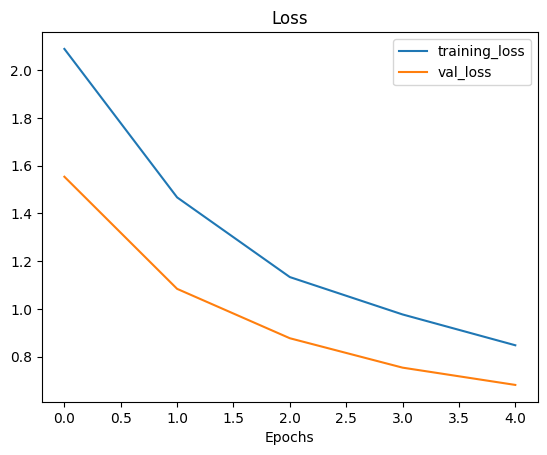

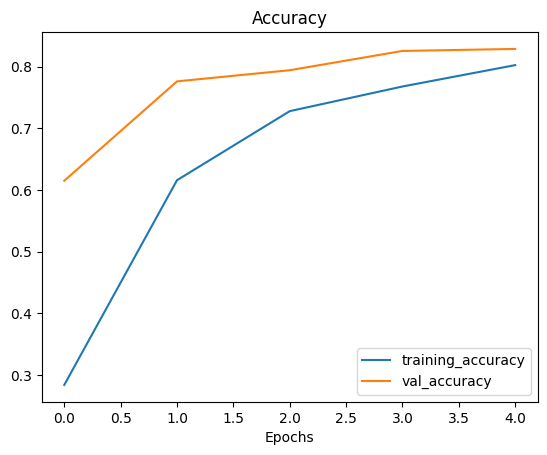

In [30]:
plot_loss_curves(history_10_percent_data_aug)

In [31]:
# Load in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)
loaded_weights_model_result = model_2.evaluate(test_data)

79/79 [==============================] - 7s 87ms/step - loss: 0.6689 - accuracy: 0.8240


In [32]:
# If the results from our native model and the loaded weights are the same, this should output True
results_10_percent_data_aug == loaded_weights_model_result

True

In [33]:
import numpy as np
# Check to see if loaded model results are very clase to native model results (should output true)
np.isclose(np.array(results_10_percent_data_aug),np.array(loaded_weights_model_result))

array([ True,  True])

# Model 3: Fine-tuning an existing model on 10% of the data

In [34]:
model_2.layers

In [35]:
for layer_number, layer in enumerate(model_2.layers):
  print(f'Layer number: {layer_number} | Layer name: {layer.name} | Trainable? {layer.trainable}')

Layer number: 0 | Layer name: input_layer | Trainable? True
Layer number: 1 | Layer name: data_augmentation | Trainable? True
Layer number: 2 | Layer name: efficientnetv2-b0 | Trainable? False
Layer number: 3 | Layer name: global_average_pooling_layer | Trainable? True
Layer number: 4 | Layer name: output_layer | Trainable? True


In [36]:
model_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                1281

In [37]:
# Acces the base model layers of model_2
model_2_base_model = model_2.layers[2]
model_2_base_model.name

'efficientnetv2-b0'

In [38]:
# How many layers are trainable in our model_2_base_model
print(len(model_2_base_model.trainable_variables))    # layer at index 2 is the EfficientNetV2B0 layer

0


In [39]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetv2-b0 False
3 global_average_pooling_layer True
4 output_layer True


In [40]:
# Make all the layers in model_2_base_model trainable                 # make learning rate as small as you can in order to not spoil weights of previous model
model_2_base_model.trainable = True

# Freeze all layers except for the last 10
for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False

# Recompile the whole model (always recompile after any adjustment to a model)
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),   # lr is 10x lower than before for fine tuning
                metrics=['accuracy'])

In [41]:
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [42]:
print(len(model_2.trainable_variables))

12


In [43]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with mode trainable layers)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs = fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch = history_10_percent_data_aug.epoch[-1], # start from previous last epoch
                                               validation_steps = int(0.25 * len(test_data)),
                                               )

Epoch 5/10
24/24 [==============================] - 39s 789ms/step - loss: 0.7006 - accuracy: 0.7907 - val_loss: 0.5440 - val_accuracy: 0.8306
Epoch 6/10
24/24 [==============================] - 17s 680ms/step - loss: 0.6179 - accuracy: 0.8093 - val_loss: 0.4554 - val_accuracy: 0.8553
Epoch 7/10
24/24 [==============================] - 15s 645ms/step - loss: 0.5424 - accuracy: 0.8400 - val_loss: 0.4827 - val_accuracy: 0.8372
Epoch 8/10
24/24 [==============================] - 24s 944ms/step - loss: 0.5275 - accuracy: 0.8240 - val_loss: 0.4436 - val_accuracy: 0.8569
Epoch 9/10
24/24 [==============================] - 16s 589ms/step - loss: 0.5043 - accuracy: 0.8373 - val_loss: 0.4589 - val_accuracy: 0.8421
Epoch 10/10
24/24 [==============================] - 17s 692ms/step - loss: 0.4469 - accuracy: 0.8533 - val_loss: 0.4285 - val_accuracy: 0.8520


In [44]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.2840000092983246, 0.6159999966621399, 0.7279999852180481, 0.7680000066757202, 0.8026666641235352, 0.7906666398048401, 0.809333324432373, 0.8399999737739563, 0.8240000009536743, 0.8373333215713501, 0.8533333539962769]


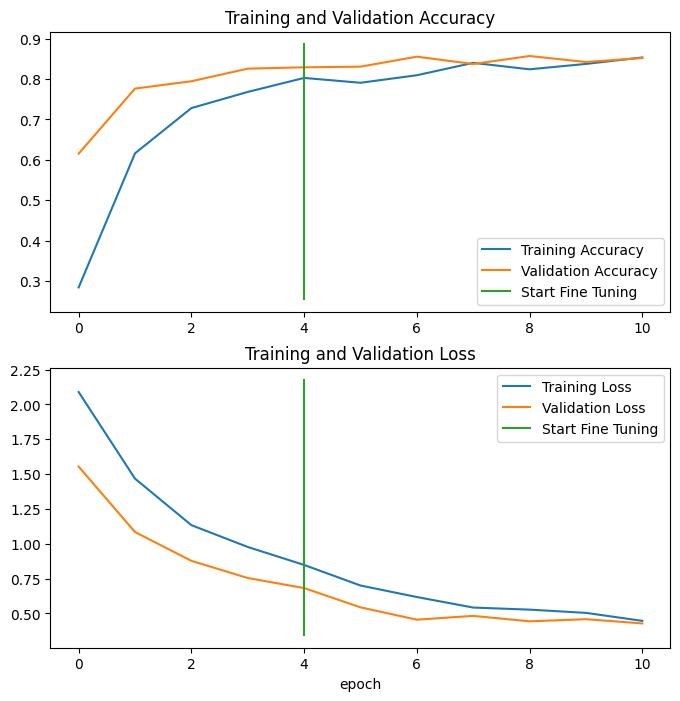

In [45]:
compare_historys(original_history = history_10_percent_data_aug,
                 new_history = history_fine_10_percent_data_aug,
                 initial_epochs=5)

# Model 4: Fine tuning an existing model all of the data

In [46]:
# Download and unzip 10 classes of data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2024-05-01 11:57:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   158MB/s    in 3.1s    

2024-05-01 11:57:14 (158 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [47]:
# How many images are we working with now?
walk_through_dir

<function helper_functions.walk_through_dir(dir_path)>

In [48]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode='categorical',
                                                                                 image_size=IMG_SIZE)

# Note: tis is the samme test dataset we've been using for the previous modelling experiments
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [49]:
# Create a new instance of model_2 for Experiment 4
model_4 = create_base_model(learning_rate=1e-4)

In [50]:
# Load previously checkpointed weights
model_4.load_weights(checkpoint_path)

In [51]:
print(len(model_4.trainable_variables))

2


In [52]:
# After loading the weights, this should have gone down (no fine-tuning)
model_4.evaluate(test_data)

79/79 [==============================] - 8s 65ms/step - loss: 0.6689 - accuracy: 0.8240


[0.6689302921295166, 0.8240000009536743]

In [53]:
# Check which layers are tuneable in the whole model
for layer_number, layer in enumerate(model_4.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetv2-b0 False
3 global_average_pooling_layer True
4 output_layer True


In [54]:
# Unfreeze the top 10 layers in model_2's base_model
model_4_base_model = model_4.layers[2]
model_4_base_model.trainable = True

for layer in model_4_base_model.layers[:-10]:
  layer.trainable=False

In [55]:
for layer_number, layer in enumerate(model_4_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_5 False
1 rescaling_4 False
2 normalization_4 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [56]:
[(layer_number, layer.name, layer.trainable) for layer_number, layer in enumerate(model_4_base_model.layers)]

[(0, 'input_5', False),
 (1, 'rescaling_4', False),
 (2, 'normalization_4', False),
 (3, 'stem_conv', False),
 (4, 'stem_bn', False),
 (5, 'stem_activation', False),
 (6, 'block1a_project_conv', False),
 (7, 'block1a_project_bn', False),
 (8, 'block1a_project_activation', False),
 (9, 'block2a_expand_conv', False),
 (10, 'block2a_expand_bn', False),
 (11, 'block2a_expand_activation', False),
 (12, 'block2a_project_conv', False),
 (13, 'block2a_project_bn', False),
 (14, 'block2b_expand_conv', False),
 (15, 'block2b_expand_bn', False),
 (16, 'block2b_expand_activation', False),
 (17, 'block2b_project_conv', False),
 (18, 'block2b_project_bn', False),
 (19, 'block2b_drop', False),
 (20, 'block2b_add', False),
 (21, 'block3a_expand_conv', False),
 (22, 'block3a_expand_bn', False),
 (23, 'block3a_expand_activation', False),
 (24, 'block3a_project_conv', False),
 (25, 'block3a_project_bn', False),
 (26, 'block3b_expand_conv', False),
 (27, 'block3b_expand_bn', False),
 (28, 'block3b_expand_

In [56]:
model_4.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics='accuracy')

In [58]:
fine_tune_epochs = initial_epochs + 5
model_4_history = model_4.fit(train_data_10_classes_full,
                              epochs=fine_tune_epochs,
                              initial_epoch = history_10_percent_data_aug.epoch[-1],
                              validation_data = test_data,
                              validation_steps=int(0.25 * len(test_data)))

Epoch 5/10
235/235 [==============================] - 117s 464ms/step - loss: 0.7714 - accuracy: 0.7693 - val_loss: 0.4606 - val_accuracy: 0.8569
Epoch 6/10
235/235 [==============================] - 95s 401ms/step - loss: 0.6303 - accuracy: 0.8072 - val_loss: 0.3922 - val_accuracy: 0.8799
Epoch 7/10
235/235 [==============================] - 82s 346ms/step - loss: 0.5752 - accuracy: 0.8193 - val_loss: 0.3640 - val_accuracy: 0.8849
Epoch 8/10
235/235 [==============================] - 69s 293ms/step - loss: 0.5370 - accuracy: 0.8321 - val_loss: 0.3430 - val_accuracy: 0.8914
Epoch 9/10
235/235 [==============================] - 66s 279ms/step - loss: 0.5184 - accuracy: 0.8367 - val_loss: 0.3124 - val_accuracy: 0.9046
Epoch 10/10
235/235 [==============================] - 59s 249ms/step - loss: 0.4927 - accuracy: 0.8412 - val_loss: 0.2948 - val_accuracy: 0.9013


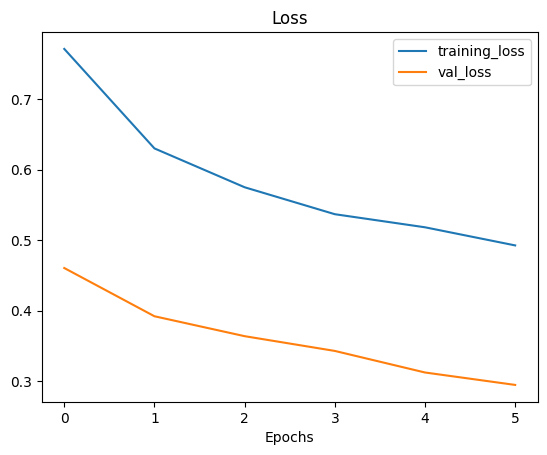

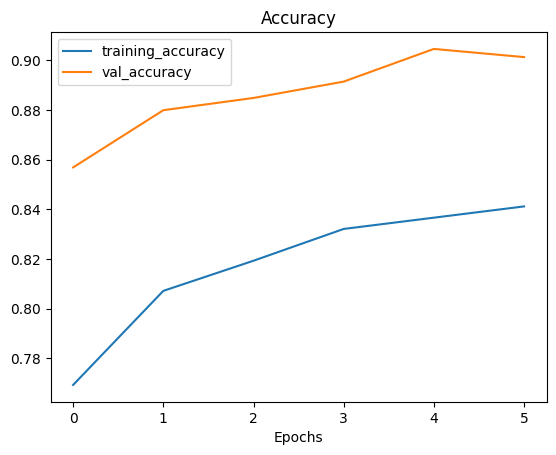

In [65]:
plot_loss_curves(model_4_history)

5
11
[0.2840000092983246, 0.6159999966621399, 0.7279999852180481, 0.7680000066757202, 0.8026666641235352, 0.7693333625793457, 0.807200014591217, 0.8193333148956299, 0.8321333527565002, 0.8366666436195374, 0.8411999940872192]


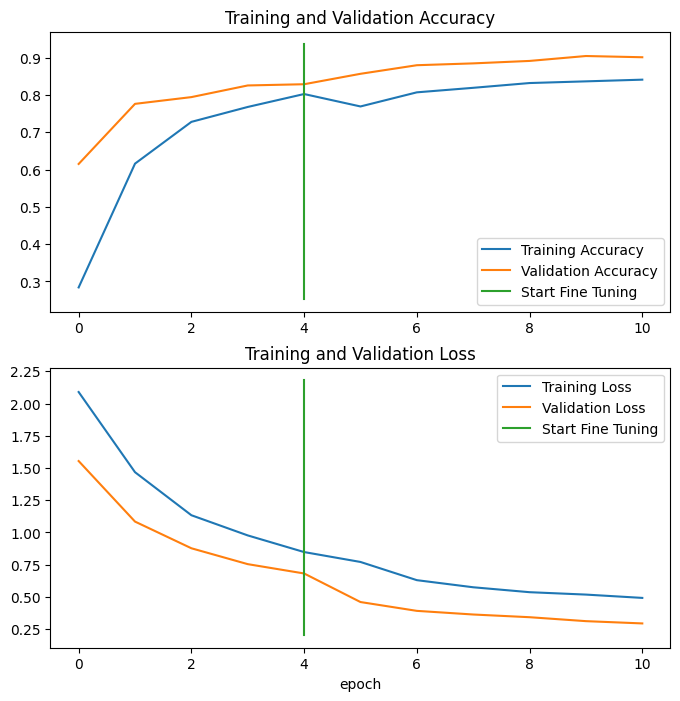

In [69]:
# How did fine-tuning go with mode data?
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=model_4_history,
                 initial_epochs=5)

# Model to predict 101 Classes